In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from os import path
from scipy.stats import spearmanr, pearsonr, kendalltau
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn import preprocessing, linear_model
from scipy.stats import zscore
from scipy.stats import poisson
from statsmodels.formula.api import logit
from sklearn.tree import DecisionTreeClassifier 

PATH_ORIGINAL_DST = 'dataset/original'
PATH_DST = 'dataset'

In [2]:
df = pd.read_csv(path.join(PATH_DST, 'dataset_v3_ENCODED.csv')).drop(columns=['Unnamed: 0'])

df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome,continent
0,1872-11-30,159.0,61.0,0.0,0.0,56.0,588.0,158.0,0.0,0.0,3.0
1,1873-03-08,61.0,159.0,4.0,2.0,56.0,919.0,60.0,0.0,1.0,3.0
2,1874-03-07,159.0,61.0,2.0,1.0,56.0,588.0,158.0,0.0,1.0,3.0
3,1875-03-06,61.0,159.0,2.0,2.0,56.0,919.0,60.0,0.0,0.0,3.0
4,1876-03-04,159.0,61.0,3.0,0.0,56.0,588.0,158.0,0.0,1.0,3.0


In [3]:
# devo individuare la distribuzione notevole che più approssima il campione preso in esame.

# nota: voglio prevedere il numero di goal fatti dalla squadra home e quella away

# Supponiamo di sapere per certo che i pesi si distribuiscono secondo una distribuzione Gaussiana ed 
# effettuiamo il fit dei parametri. Confrontiamo dunque la Gaussiana trovata con l'istogramma di densità e la
# stima di densità del campione:

Skewness home_score: 1.995785
Skewness away_score: 2.095158
Kurtosis home_score: 1.995785
Kurtosis away_score: 2.095158


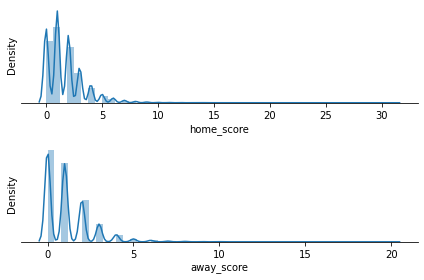

In [4]:
# suppress future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axs = plt.subplots(2,1)
sns.despine(left=True)

sns.distplot(df['home_score'], ax=axs[0])
sns.distplot(df['away_score'], ax=axs[1])

plt.setp(axs, yticks=[])
plt.tight_layout()

# da notare l'asimmetria a dx e scriverlo.. e curtosi verso un certo punto.

print("Skewness home_score: %f" % df['home_score'].skew())
print("Skewness away_score: %f" % df['away_score'].skew())
print("Kurtosis home_score: %f" % df['home_score'].skew())
print("Kurtosis away_score: %f" % df['away_score'].skew())

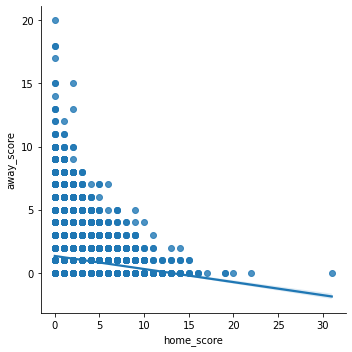

In [5]:
# valuto una relazione lineare tra home_score e away_score considerando che presenta cmq molti outliers: 
sns.lmplot('home_score','away_score',data=df)

In [6]:
df['total_score'] = df['home_score'] + df['away_score']

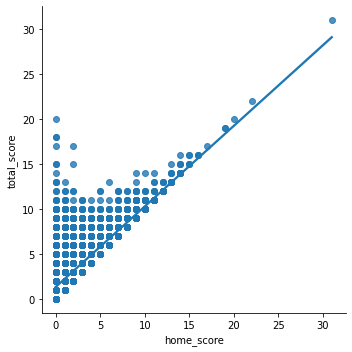

In [7]:
sns.lmplot('home_score','total_score',data=df)

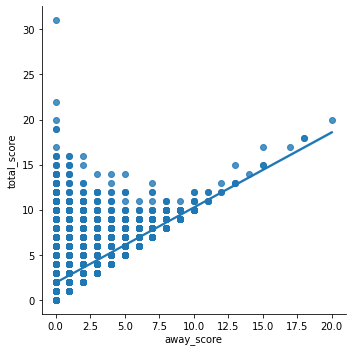

In [8]:
sns.lmplot('away_score','total_score',data=df)

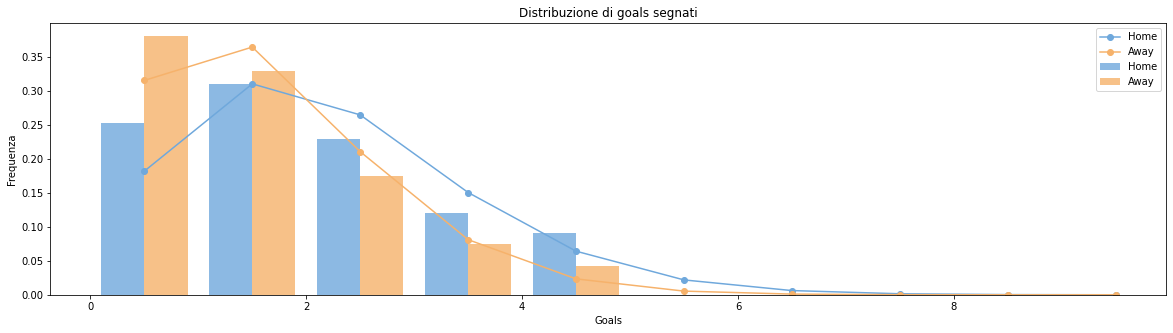

In [15]:
# confronto l'istogramma con la distribuzione di poisson per vedere se sono simili
plt.figure(figsize=(20,5))

plt.hist(df[['home_score', 'away_score']].values, range(6), alpha=0.8, label=['Home', 'Away'], density=True, color=["#6fa8dc", "#f6b26b"])

# sns.histplot(df[df['home_score'] > 0]['home_score'], kde=False, bins=30, label="Home score", color="y")
# sns.histplot(df[df['away_score'] > 0]['away_score'], kde=False, bins=30, label="Away score", color="b")
# plt.xticks([i for i in range(1,15)])

means = df[['home_score','away_score']].mean()
# construct Poisson  for each mean goals value
poisson_pred = np.column_stack([[poisson.pmf(k, means[j]) for k in range(10)] for j in range(2)])

plt.plot([i-0.5 for i in range(1,11)], poisson_pred[:,0],linestyle='-', marker='o',label="Home", color = '#6fa8dc')
plt.plot([i-0.5 for i in range(1,11)], poisson_pred[:,1],linestyle='-', marker='o',label="Away", color = '#f6b26b')

plt.legend()
plt.title("Distribuzione di goals segnati")
plt.xlabel("Goals")
plt.ylabel("Frequenza")
plt.show()

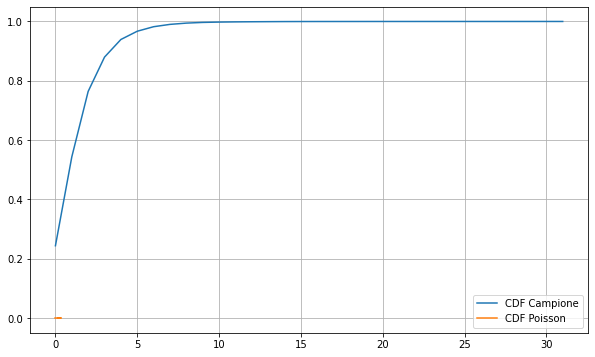

In [48]:
# confronto con cdf
plt.figure(figsize=(10,6))

# weight home_score
cdf_hs = df['home_score'].value_counts(normalize=True).sort_index().cumsum()
cdf_hs.plot()

# poisson cdf predicted
poisson_pred = [poisson.pmf(k, means[0]) for k in cdf_hs.index.values]
#TODO

plt.plot()
plt.grid()
plt.legend(['CDF Campione','CDF Poisson'])
plt.show()

In [45]:
poisson_pred.cdf

AttributeError: 'list' object has no attribute 'cdf'

In [ ]:
# q plot

In [ ]:
# applica modello

In [ ]:
# --- DEPR ----
# pairplot example
sns.pairplot(df)
plt.show()